Lab: Logistic Regression, LDA, QDA, and KNN

In [29]:
#!pip install -Uq statsmodels

Import the necessary libraries

In [30]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

#-----------------------#

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
smarket = load_data('Smarket')

In [32]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [33]:
corr_mat = smarket.drop(['Year'],axis=1).corr()
corr_mat

/tmp/ipykernel_20804/3601181988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = smarket.drop(['Year'],axis=1).corr()


,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


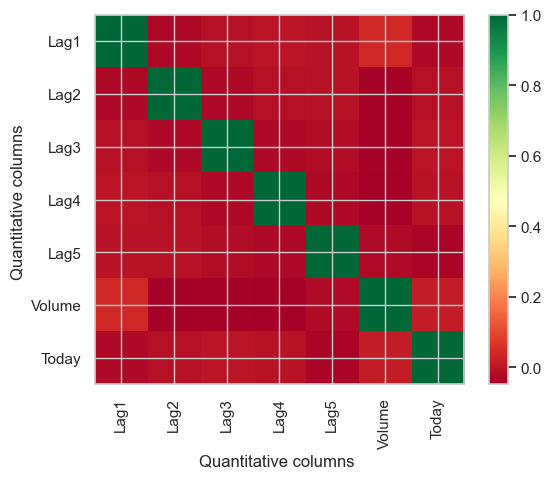

In [34]:
#Further we find the corr() between the quantitative columns, to check how they are related to each other
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Correlation matrix
plt.grid('off')
plt.xlabel('Quantitative columns ')
plt.ylabel('Quantitative columns ')
plt.imshow(corr_mat, cmap='RdYlGn', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_mat)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat)),corr_mat.columns,rotation=360)
plt.show()
#Correlation matrix


<Axes: >

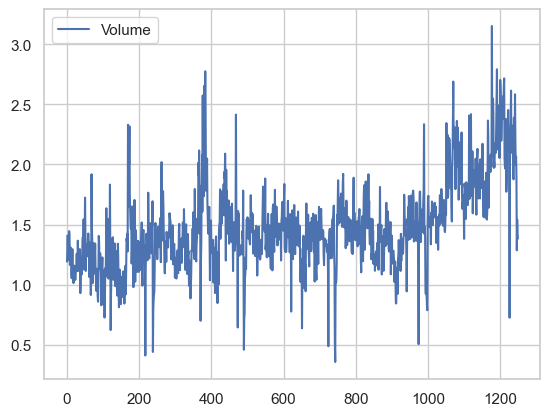

In [35]:
smarket.plot(y='Volume')

Implementation of Logistic Regression model

In [36]:
smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [52]:
# We will fit a logreg model to predict the qualitative feature or the target variable Direction.We wil use the statsmodels library for that

allvars = smarket.columns.drop(['Year','Direction','Today'])
allvars
design = MS(allvars)

X = design.fit_transform(smarket)
y = smarket.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [53]:
results.params #shows the coeffs


intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [54]:
results.pvalues 

intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [55]:
probs = results.predict ()
probs [:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [56]:
labels = np.array (['Down']*1250)
labels[probs >0.5] = "Up"

In [57]:
confusion_table(labels , smarket.Direction)

Truth,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [58]:
np.mean(labels==smarket.Direction)

0.5216

In [60]:
train = (smarket.Year < 2005)
Smarket_train = smarket.loc[train]
Smarket_test = smarket.loc[~train]
Smarket_test.shape

(252, 9)

In [61]:
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train ,
X_train ,
family=sm.families.Binomial ())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [63]:
D = smarket.Direction
L_train , L_test = D.loc[train], D.loc[~train]

In [67]:
labels = np.array(['Down']*252)
labels[probs>0.5] = 'Up'
confusion_table(labels , L_test)

Truth,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [68]:
np.mean(labels==L_test)

0.4801587301587302

In [69]:
model = MS(['Lag1', 'Lag2']).fit(smarket)
X = model.transform(smarket)
X_train , X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train ,
X_train ,
family=sm.families.Binomial ())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array (['Down']*252)
labels[probs >0.5] = 'Up'
confusion_table(labels , L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [70]:
newdata = pd.DataFrame({'Lag1':[1.2, 1.5], 'Lag2':[3.4,5.6]})

In [71]:
nexX = model.transform(newdata)
results.predict(nexX)



0    0.453687
1    0.425474
dtype: float64

Now with Linear Discriminant Analysis

In [77]:
lda = LDA(store_covariance=True)
# Since the LDa estimator automatically adds an intercept, we should remove teh column correstponding to the intercept in both X_train and X_test

#X_train, X_test = [M.drop(columns=['Intercept']) for  M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [79]:
lda.means_
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [81]:
lda.priors_  #indicates 49% up and 51% down

array([0.49198397, 0.50801603])

In [82]:
lda_pred = lda.predict(X_test)

In [83]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [85]:
#we can also predict the probability

lda_prob = lda.predict_proba(X_test)
np.all(np.where(lda_prob[:,1] > 0.5, 'Up', 'Down') == lda_pred)

True

Using Naive Bayes

In [86]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [87]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [88]:
NB.class_prior_

array([0.49198397, 0.50801603])

In [89]:
NB.theta_, NB.var_

(array([[ 0.04279022,  0.03389409],
        [-0.03954635, -0.03132544]]),
 array([[1.50355429, 1.53246749],
        [1.51401364, 1.48732877]]))

In [91]:
X_train[L_train=='Down'].mean()

Lag1    0.042790
Lag2    0.033894
dtype: float64

In [92]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [93]:
np.mean(nb_labels==L_test)

0.5952380952380952

K-Nearest Neighbors

In [97]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, L_train)
knn1_pred=knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [99]:
np.mean(knn1_pred==L_test) #50% accuracy and as good as random



0.5

In [104]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred==L_test)

#accuracy improves slightly

0.5317460317460317

In [109]:
knn3 = KNeighborsClassifier(n_neighbors=4)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
np.mean(knn3_pred==L_test)

#seems like the accuracy decreases with number of neighbors over than 3

0.5158730158730159

## Using the Caravan Dataset

In [114]:
Caravan = load_data('Caravan')
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [113]:
Caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [115]:
#The target variable in 'Purchase'ArithmeticError
Purchase = Caravan.Purchase
Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [122]:
feature_df = Caravan.drop(columns=['Purchase'])
feature_df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [123]:
# since there are values of different scales
# We wil standardize the dataset

scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

In [124]:
scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

In [145]:
len(feature_std.columns)

85

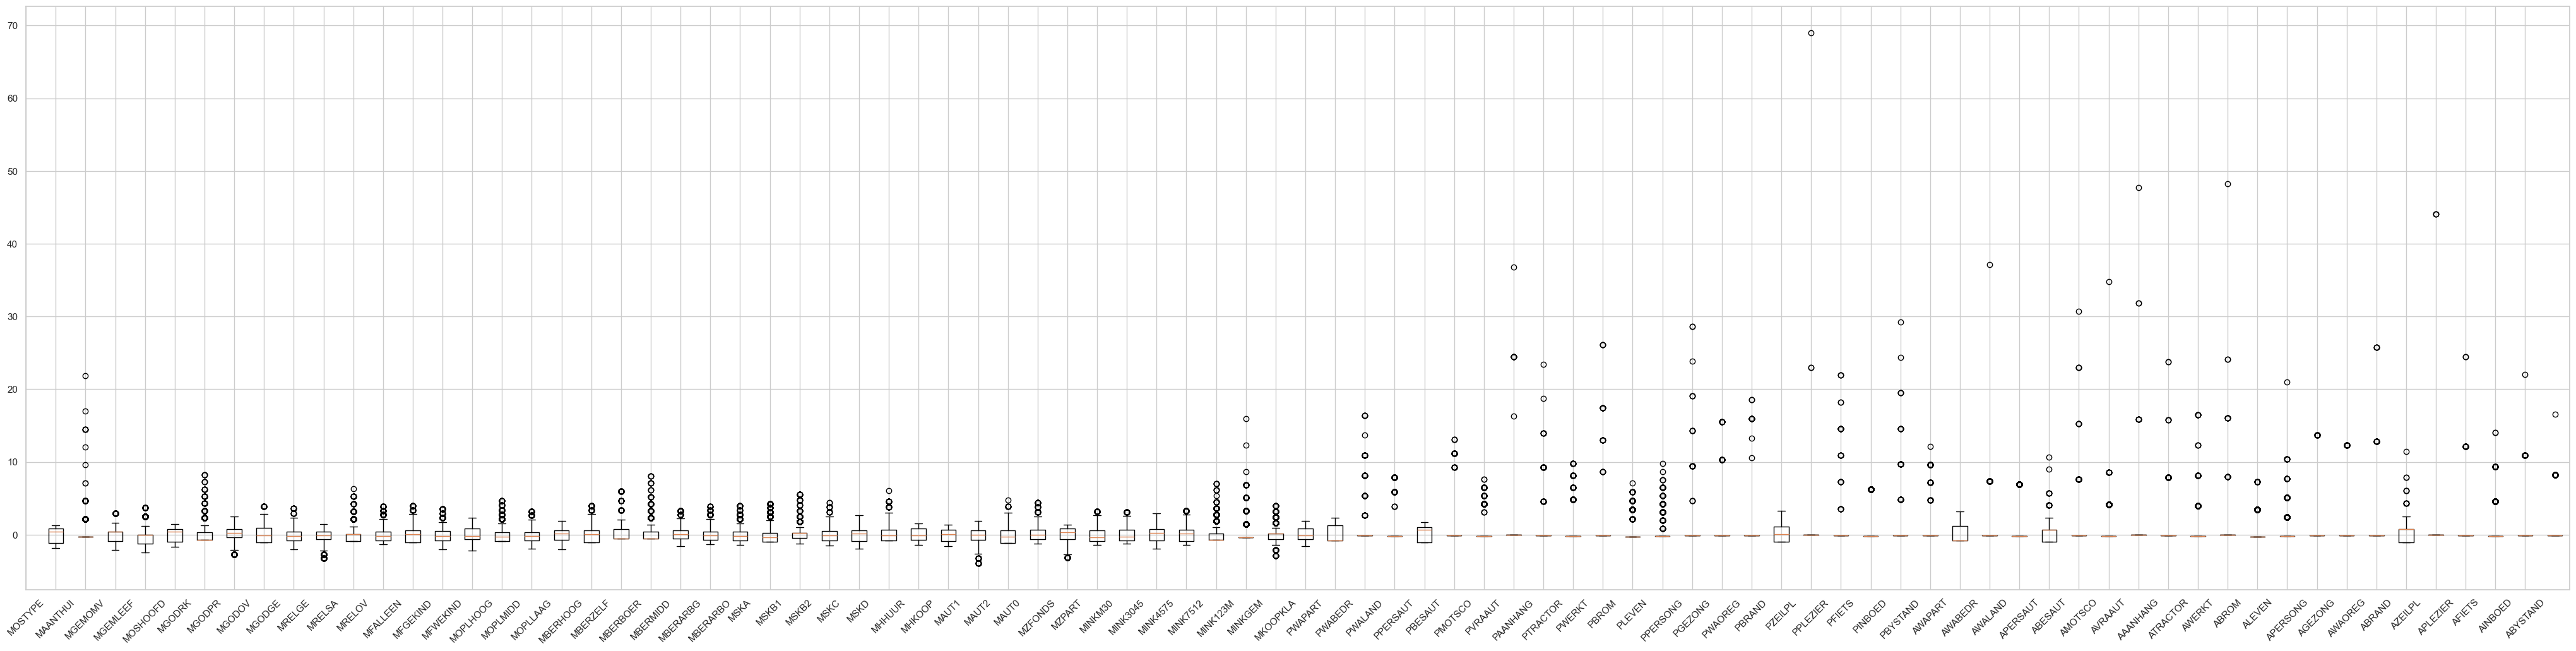

In [149]:
feature_std = pd.DataFrame(X_std, columns=feature_df.columns)
plt.figure(figsize=(52,12))
plt.boxplot(feature_std)
plt.xticks(ticks=range(len(feature_std.columns)),labels=feature_std.columns, rotation=45)
plt.show()


In [191]:
len(Purchase)

5822

In [190]:
X_train, X_test, y_train, y_test = train_test_split(feature_std,
                                                    Purchase,
                                                    test_size=1000,
                                                    random_state=0)

In [211]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

knn1_pred = knn1.predict(X_test)

In [212]:
np.mean(y_test!=knn1_pred), np.mean(y_test!='No')

(0.111, 0.067)

In [213]:
confusion_table(knn1_pred, y_test)

Truth,No,Yes
Predicted,,
No,880,58
Yes,53,9


In [214]:
lda.fit(X_train, y_train)
lda_pred =lda.predict(X_test)
np.mean(y_test!=lda_pred), np.mean(y_test!='No')
confusion_table(lda_pred,y_test)
# lda is great at predicting No, but not so good at predicting yes

Truth,No,Yes
Predicted,,
No,926,64
Yes,7,3


Tuning Parameters

In [218]:
for K in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    C = confusion_table(knn_pred, y_test)
    temp1 = ('K={0:d}: # predicted to rent: {1:>2},' + ' # who did rent {2:d}, accuracy {3:.1%}')
    pred = C.loc['Yes'].sum()
    did_rent=C.loc['Yes','Yes']
    print(temp1.format(K,pred,did_rent,did_rent/pred))
# K=7 predicted the best

K=1: # predicted to rent: 62, # who did rent 9, accuracy 14.5%
K=2: # predicted to rent:  6, # who did rent 1, accuracy 16.7%
K=3: # predicted to rent: 20, # who did rent 3, accuracy 15.0%
K=4: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=5: # predicted to rent:  7, # who did rent 1, accuracy 14.3%
K=6: # predicted to rent:  4, # who did rent 0, accuracy 0.0%
K=7: # predicted to rent:  5, # who did rent 1, accuracy 20.0%


Comparison to Logistic Regression

In [221]:
logit  = LogisticRegression(C=1e10, solver='liblinear')
logit.fit(X_train, y_train)
logit_pred = logit.predict_proba(X_test)
logit_labels = np.where(logit_pred[:,1] > .5, 'Yes', 'No')
confusion_table(logit_labels, y_test)

Truth,No,Yes
Predicted,,
No,931,67
Yes,2,0


In [223]:
#However if we use the threshold 0.25 instead of 0.5 we get better results cause the distribution is not normal and skewed

logit_labels = np.where(logit_pred[:,1]>0.25, 'Yes','No')
confusion_table(logit_labels,y_test)

Truth,No,Yes
Predicted,,
No,913,58
Yes,20,9
